In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
data = pd.read_csv('model_ready_match_data_multi_class.csv')
data.head()

,goals,shots,shot_percent,passes_made,pass_attempts,pass_percent,tackles_made,tackle_attempts,tackle_percent,red_cards,players_in_match,forwards,midfielders,defenders,goalkeeper,any,result
0,1,6,0.17,95,125,0.76,18,49,0.37,0,8,2,3,3,0,0,1
1,5,13,0.38,92,120,0.77,13,29,0.45,0,8,2,3,3,0,0,2
2,1,7,0.14,99,124,0.80,17,65,0.26,0,10,2,4,4,0,0,0
3,1,11,0.09,154,195,0.79,16,41,0.39,0,11,2,4,4,1,0,1
4,3,13,0.23,118,145,0.81,10,43,0.23,0,10,2,4,4,0,0,2


In [3]:
X = data.drop("result", axis=1)
y = data.result

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.997/0.573
k: 3, Train/Test Score: 0.778/0.616
k: 5, Train/Test Score: 0.741/0.629
k: 7, Train/Test Score: 0.728/0.641
k: 9, Train/Test Score: 0.718/0.652
k: 11, Train/Test Score: 0.713/0.657
k: 13, Train/Test Score: 0.710/0.664
k: 15, Train/Test Score: 0.707/0.667
k: 17, Train/Test Score: 0.704/0.667
k: 19, Train/Test Score: 0.702/0.670


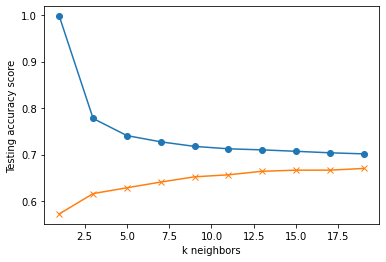

In [7]:
# Graph to show identify optimal K value (7)
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(X_train_scaled, y_train)
print("k=13 Test Acc: %.3f" % knn_model.score(X_test_scaled, y_test))

k=13 Test Acc: 0.664


In [10]:
y_pred_knn = knn_model.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[5281  352 1223]
 [1497  323 1107]
 [1124  261 5407]]


In [11]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      6856
           1       0.35      0.11      0.17      2927
           2       0.70      0.80      0.74      6792

    accuracy                           0.66     16575
   macro avg       0.57      0.56      0.54     16575
weighted avg       0.62      0.66      0.63     16575

